In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [7]:
digits = load_digits()
X = digits.data
y = digits.target

# Convert to DataFrame for inspection
df = pd.DataFrame(X)
df['label'] = y

# Preview data
print("Shape:", df.shape)
df.head()


Shape: (1797, 65)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [3]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis("off")
plt.suptitle("Sample Digits from MNIST")
plt.tight_layout()
plt.show()


Cross-Validation Scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Mean Accuracy: 95.33%


/tmp/ipython-input-8-2791551054.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='tab10')


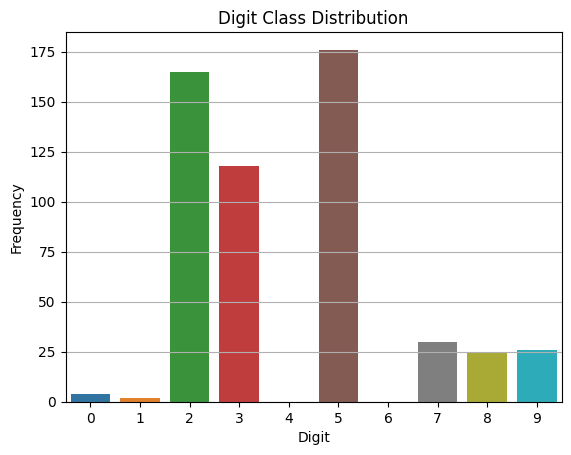

In [8]:
sns.countplot(x='label', data=df, palette='tab10')
plt.title("Digit Class Distribution")
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()


In [9]:
model = LogisticRegression(max_iter=1000)
scores = cross_val_score(model, X, y, cv=5)

print("Cross-Validation Scores:", scores)
print("Mean Accuracy: {:.2f}%".format(np.mean(scores) * 100))


Cross-Validation Scores: [0.92222222 0.87222222 0.94150418 0.94150418 0.89693593]
Mean Accuracy: 91.49%


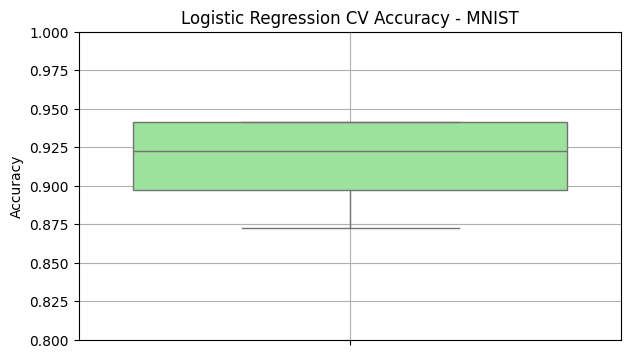

In [10]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=scores, color='lightgreen')
plt.title("Logistic Regression CV Accuracy - MNIST")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.grid(True)
plt.show()


model = SVC(kernel='linear', C=1)
scores = cross_val_score(model, X, y, cv=5)
